<a href="https://colab.research.google.com/github/HectorAbraham/Ecs.-Dif.-Parciales/blob/main/Problemas_de_Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

#Definimos las variables en forma simbólica

In [2]:
x, k = sp.symbols('x k', real=True)
A, B = sp.symbols('A B', real=True)

# Expresamos la solucion general: X'' + kX = 0

In [3]:
X = A * sp.cos(sp.sqrt(k)*x) + B * sp.sin(sp.sqrt(k)*x)

# Aplicamos las condiciones de frontera y resolvemos el sistema de ecuaciones para determinar el valor de las constantes

In [10]:
def resolver_sturm_liouville(condicion_1, condicion_2, tipo='Dirichlet'):
    eq1 = condicion_1.subs({'X': X, 'x': 0})
    eq2 = condicion_2.subs({'X': X, 'x': 1})

    soluciones = sp.solve([eq1, eq2], (A, B), dict=True)

    if not soluciones:
        print(f"No hay solución trivial para {tipo}, buscando autovalores...")
        # Determinante del sistema homogéneo para valores no triviales
        M = sp.Matrix([
            [sp.diff(X, A).subs(x, 0), sp.diff(X, B).subs(x, 0)],
            [sp.diff(X, A).subs(x, 1), sp.diff(X, B).subs(x, 1)],
        ])
        det = M.det()
        k_vals = sp.solveset(sp.simplify(det), k, domain=sp.S.Reals)
        print(f"Valores propios encontrados para {tipo}: {k_vals}")
        return k_vals
    else:
        print(f"Solución trivial encontrada: {soluciones}")
        return soluciones

# Definimos condiciones como expresiones simbólicas
# Dirichlet: X(0)=0, X(1)=0
# Neumann: X'(0)=0, X'(1)=0


In [11]:
dirichlet_cond1 = X.subs(x, 0)
dirichlet_cond2 = X.subs(x, 1)

X_prime = sp.diff(X, x)
neumann_cond1 = X_prime.subs(x, 0)
neumann_cond2 = X_prime.subs(x, 1)

#Resolvemos cada uno de  los problemas

In [12]:
k_dirichlet = resolver_sturm_liouville(dirichlet_cond1, dirichlet_cond2, tipo='Dirichlet')
k_neumann = resolver_sturm_liouville(neumann_cond1, neumann_cond2, tipo='Neumann')

Solución trivial encontrada: [{A: 0, B: 0}]
Solución trivial encontrada: [{A: 0, B: 0}]


# Graficamos algunas funciones propias

In [23]:
def graficar_soluciones(k_exprs, tipo, n=3):
    x_vals = np.linspace(0, 1, 400)
    plt.figure(figsize=(10, 6))
    for i, k_val in enumerate(sorted(k_exprs)[:n]):
        k_val = sp.simplify(k_val)
        sqrt_k = sp.sqrt(k_val)
        if tipo == 'Dirichlet':
            Xn = sp.sin(sqrt_k * x)
        else:
            Xn = sp.cos(sqrt_k * x)
        f = sp.lambdify(x, Xn, 'numpy')
        y_vals = f(x_vals)
        if np.isscalar(y_vals):
            y_vals = np.full(x_vals.shape, y_vals)
        plt.plot(x_vals, y_vals, label=f'n={i+1}, k={k_val}')

    plt.title(f"Funciones propias para condiciones de {tipo}")
    plt.xlabel("x")
    plt.ylabel("X(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
k_dirichlet_exp = [n**2 * sp.pi**2 for n in range(1, 6)]
k_neumann_exp = [n**2 * sp.pi**2 for n in range(0, 6)]

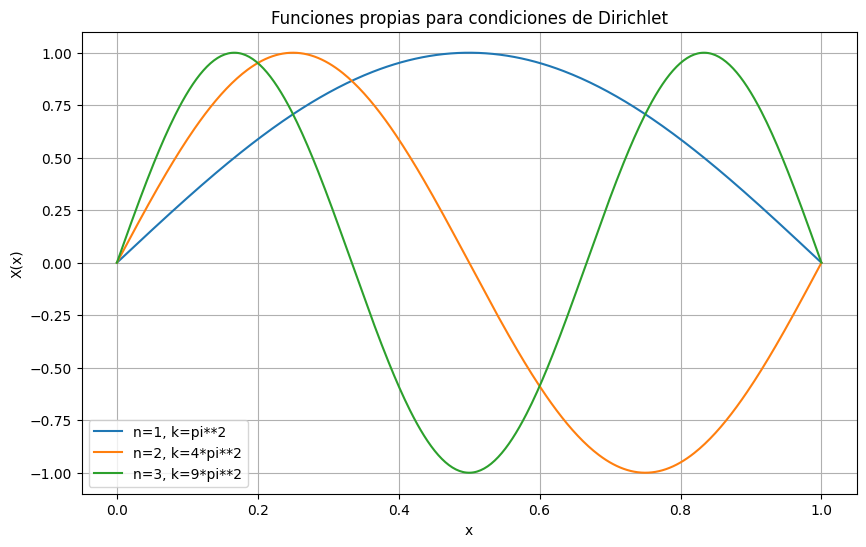

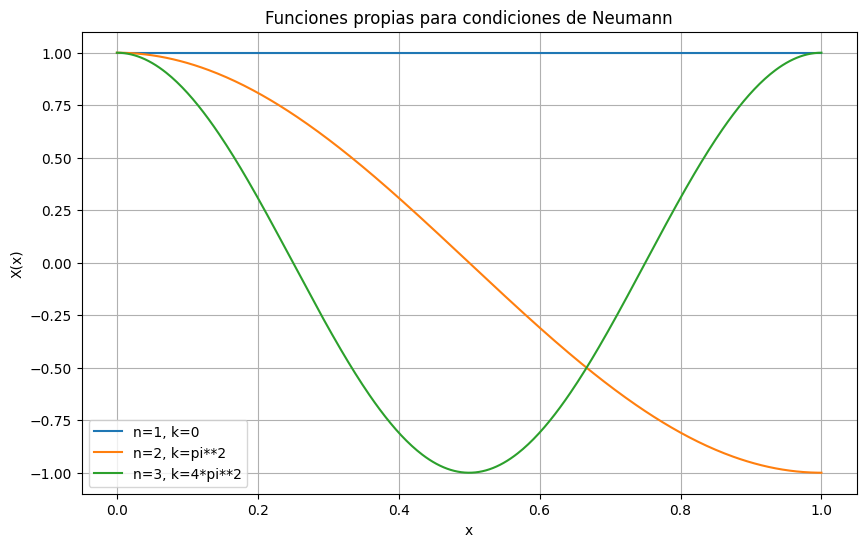

In [25]:
graficar_soluciones(k_dirichlet_exp, tipo='Dirichlet')
graficar_soluciones(k_neumann_exp, tipo='Neumann')